In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples

#  Portfolio Management: Clustering Investors

 We are going to assign clients into groups of investors profiles, wherein each group has investors with similar characteristics. This not only can lead to standarization in the investment management process, but also helps to save time to use in other processes.
 
 Clustering algorithms will be trained by different factors such as age, income, kids, risk tolerance, etc.
 
 The data used is from the Survey of Consumer Finances, which is publicated by the Federal Reserve Board

In [2]:
df = pd.read_excel('C:/Users/VARGAS M/Desktop/Data Sets/Financial Crisis/SCFP2009panel.xlsx')

In [3]:
df.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,NHMORTPCT,WAGEINCPCT,BUSSEFARMINCPCT,INTDIVINCPCT,KGINCPCT,SSRETINCPCT,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I
0,1,11,11668.134198,47,3,12,2,1,0,2,...,-21.052632,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,270.403054,57
1,1,12,11823.456494,47,3,12,2,1,0,2,...,-21.052632,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,249.593620,57
2,1,13,11913.228354,47,3,12,2,1,0,2,...,-50.000000,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,209.233358,57
3,1,14,11929.394266,47,3,12,2,1,0,2,...,-33.333333,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,209.273158,57
4,1,15,11917.722907,47,3,12,2,1,0,2,...,-38.596491,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,232.690767,57


In [4]:
df.shape

(19285, 515)

In [5]:
df.columns.tolist()

['YY1',
 'Y1',
 'WGT09',
 'AGE07',
 'AGECL07',
 'EDUC07',
 'EDCL07',
 'MARRIED07',
 'KIDS07',
 'LIFECL07',
 'FAMSTRUCT07',
 'RACECL',
 'H_RACECL',
 'RACE',
 'H_RACE',
 'OCCAT107',
 'OCCAT207',
 'INDCAT07',
 'HHEALTH07',
 'SPHEALTH07',
 'INCOME07',
 'WAGEINC07',
 'BUSSEFARMINC07',
 'INTDIVINC07',
 'KGINC07',
 'SSRETINC07',
 'TRANSFOTHINC07',
 'PENACCTWD07',
 'NORMINC07',
 'RISK07',
 'PSAVING07',
 'WSAVED07',
 'SAVED07',
 'SAVRES1',
 'SAVRES2',
 'SAVRES3',
 'SAVRES4',
 'SAVRES5',
 'SAVRES6',
 'SAVRES7',
 'SAVRES8',
 'SAVRES9',
 'SPENDMOR07',
 'LATE6007',
 'USPELL07',
 'AGEFT07',
 'AGEALL07',
 'POSTRWORK07',
 'RFULL07',
 'BSHOPNONE07',
 'BSHOPGRDL07',
 'BSHOPMODR07',
 'ISHOPNONE07',
 'ISHOPGRDL07',
 'ISHOPMODR07',
 'BCALL07',
 'BMAGZNEWS07',
 'BMAILADTV07',
 'BINTERNET07',
 'BFRIENDWORK07',
 'BFINPRO07',
 'BSELF07',
 'BDONT07',
 'BOTHER07',
 'ICALL07',
 'IMAGZNEWS07',
 'IMAILADTV07',
 'IINTERNET07',
 'IFRIENDWORK07',
 'IFINPRO07',
 'ISELF07',
 'IDONT07',
 'IOTHER07',
 'BFINPLAN07',
 'IFIN

https://www.asuku.com/Risk_Profiling

https://blog.investyadnya.in/factors-affecting-personal-risk-profile/

https://blog.investyadnya.in/risk-appetite-v-s-risk-capacity-v-s-risk-tolerance/

https://blog.investyadnya.in/financial-life-cycle-based-on-personal-risk-profile/

The choosen features are selected based on characteristics normally used in the industry that determine the investor's profile. Some ideas were taken from the web pages copied on this notebook.

In [6]:
demographic_features = ['AGECL07','EDCL07','MARRIED07','KIDS07']
financial_features = ['INCCL207','NWCAT07','HHOUSES07']
will_to_risk_features = ['RISK07','SPENDMOR07']

- AGECL07: represents the age. 1 means less than 35 years old and 6 more than 75.
- EDCL07: is the education. 1 represents high school not finished and 4 college degree.
- MARRIED07: represents marital status. 1 is married and 0 not married.
- KIDS07: represents number of kids.
- INCCL207: is the income category. 1 represents less than USD 10.000 and 5 more than USD 100.000.
- NWCAT07: represents the networth. 1 means that the investor belongs to less than the 25 th perentile and 5 more than the 90 th percentile.
- HHOUSES07: 1 represents if investors have their own house and 0 they do not own house.
- RISK07: represents the willigness to take risks. 1 represents the highest level of risk.
- SPENDMOR07: represents on a scale from 1 to 5 the willingness to spend more if assets prices appreciattes. 1 being the highest level.

In [7]:
df_cluster = df[demographic_features + financial_features + will_to_risk_features].copy()

In [8]:
df_cluster.head()

,AGECL07,EDCL07,MARRIED07,KIDS07,INCCL207,NWCAT07,HHOUSES07,RISK07,SPENDMOR07
0,3,2,1,0,4,3,1,3,5
1,3,2,1,0,4,3,1,3,5
2,3,2,1,0,4,3,1,3,5
3,3,2,1,0,4,3,1,3,5
4,3,2,1,0,4,3,1,3,5


In [9]:
df_cluster.isnull().sum()

AGECL07       0
EDCL07        0
MARRIED07     0
KIDS07        0
INCCL207      0
NWCAT07       0
HHOUSES07     0
RISK07        0
SPENDMOR07    0
dtype: int64

In [59]:
df_cluster.describe()

,AGECL07,EDCL07,MARRIED07,KIDS07,INCCL207,NWCAT07,HHOUSES07,RISK07,SPENDMOR07
count,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000
mean,3.228157,3.055535,1.314752,0.876588,3.864610,3.269743,0.756547,2.971843,3.570391
std,1.494929,1.055146,0.464429,1.200590,1.203205,1.528285,0.429178,0.858167,1.293997
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,2.000000
50%,3.000000,3.000000,1.000000,0.000000,4.000000,3.000000,1.000000,3.000000,4.000000
75%,4.000000,4.000000,2.000000,2.000000,5.000000,5.000000,1.000000,4.000000,5.000000
max,6.000000,4.000000,2.000000,10.000000,5.000000,5.000000,1.000000,4.000000,5.000000


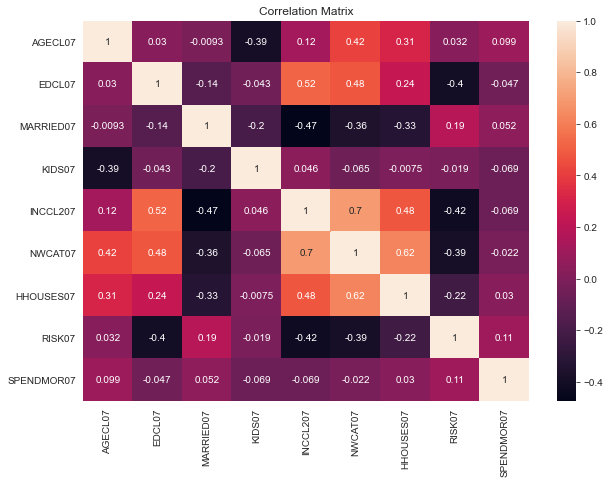

In [61]:
plt.figure(figsize=(10,7))
plt.title('Correlation Matrix')
sns.heatmap(df_cluster.corr(), annot=True)

In [10]:
# Scaling the input features

scaler = MinMaxScaler()

scaled_df_cluster = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

#### Finding optimal number of clusters

In [11]:
# Getting inertia(Sum of Squared Errors, SSE) and silhouette score for different numbers of clusters.

inertia_lst = []
silhouette_lst = []

for n in range(3,16):
    k_means = KMeans(n_clusters=n, random_state=2021, n_init=20)
    k_means.fit(scaled_df_cluster)
    silhouette_lst.append(silhouette_score(scaled_df_cluster, k_means.labels_))
    inertia_lst.append(k_means.inertia_)

In [12]:
def percentage_diff(new_val, old_val):
    return ((new_val-old_val)/old_val)*100

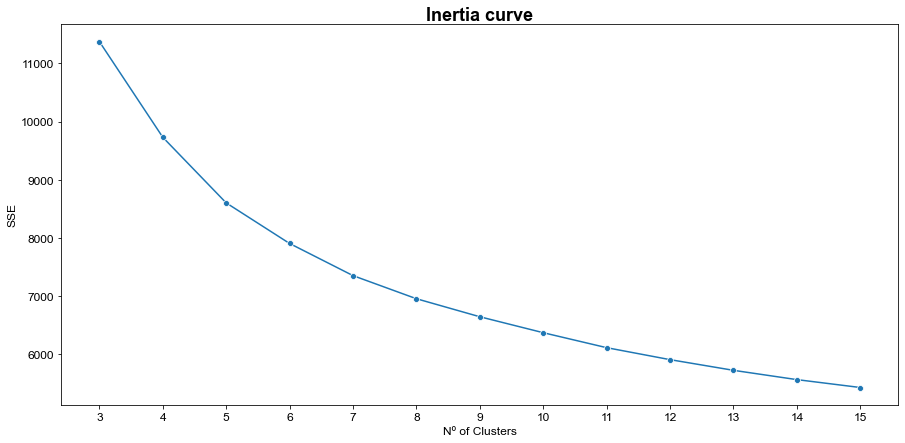

In [14]:
plt.figure(figsize=(15,7))
sns.lineplot(list(range(3,16)),inertia_lst,marker='o')
sns.set_style("darkgrid")
plt.title('Inertia curve', pad=3, fontweight='bold', fontsize=18)
plt.xlabel('Nº of Clusters', fontsize=12)
plt.ylabel('SSE', fontsize=12)
plt.xticks(list(range(3,16)),fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From the above chart we are not able to get any conclusion as it's not clearly when the inertia start to decrease slower as we keep increasing k. Beside that, inertia or sum of squared errors isn't a good performance metric by it self because when we increase the number of clusters, the metric will tend to be lower as each data point will be closer to it centroid.

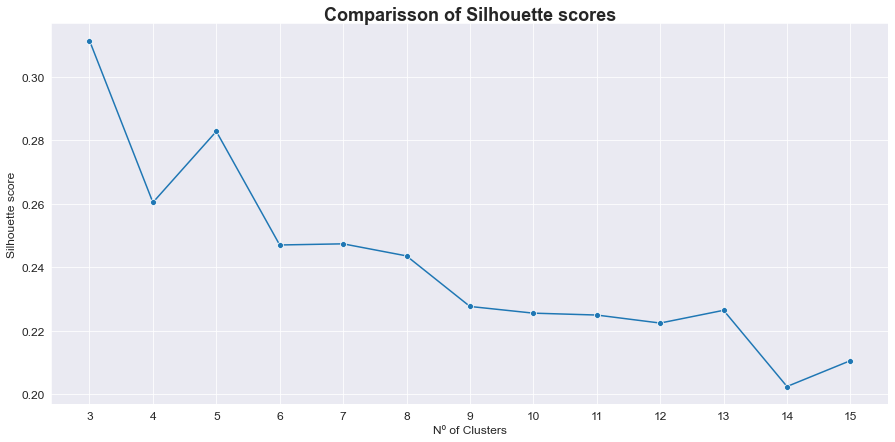

In [17]:
plt.figure(figsize=(15,7))
sns.lineplot(list(range(3,16)),silhouette_lst,marker='o')
sns.set_style("darkgrid")
plt.title('Comparisson of Silhouette scores', pad=3, fontweight='bold', fontsize=18)
plt.xlabel('Nº of Clusters', fontsize=12)
plt.ylabel('Silhouette score', fontsize=12)
plt.xticks(list(range(3,16)),fontsize=12)
plt.yticks(fontsize=12)
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.31133373420846977
For n_clusters = 5 The average silhouette_score is : 0.28275417619829324


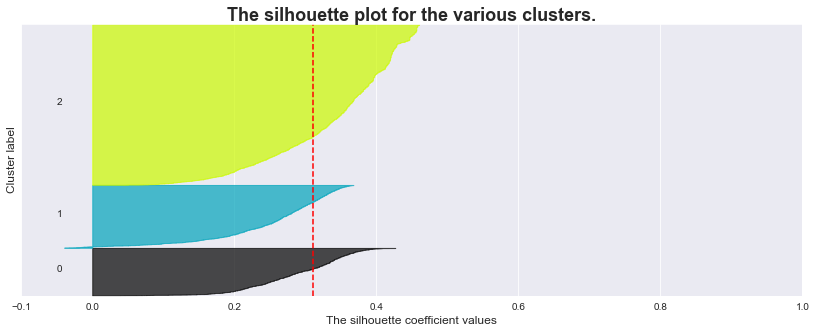

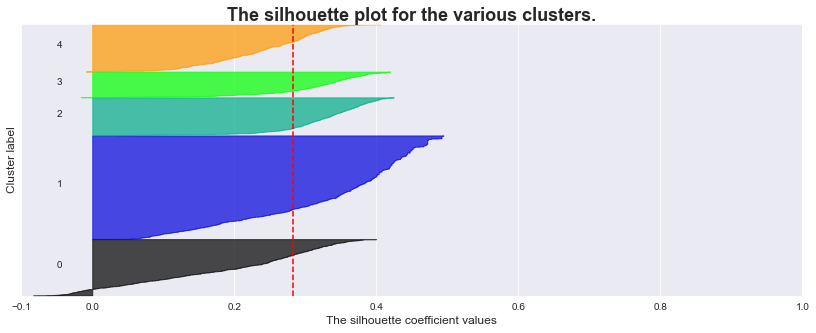

In [35]:
range_n_clusters = [3,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(14, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_df_cluster) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=2021, n_init=20)
    cluster_labels = clusterer.fit_predict(scaled_df_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_df_cluster, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_df_cluster, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.", pad=3, fontweight='bold', fontsize=18)
    ax1.set_xlabel("The silhouette coefficient values",fontsize=12)
    ax1.set_ylabel("Cluster label", fontsize=12)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

As k=3 has the larger silhouette score, we will choose that number of clusters to group investors in our dataset. This means that with k=3 clusters are more compact in comparisson to other number of clusters.

In [43]:
k_means = KMeans(n_clusters=3, random_state=2021, n_init=20)
y_preds = k_means.fit_predict(scaled_df_cluster)

In [76]:
labels = pd.DataFrame(y_preds, columns=['labels'])
final_df = pd.concat([df_cluster, labels], axis=1)
final_df = final_df.groupby('labels').mean()
final_df = final_df.rename_axis(index={'labels':'Clusters'})
final_df

,AGECL07,EDCL07,MARRIED07,KIDS07,INCCL207,NWCAT07,HHOUSES07,RISK07,SPENDMOR07
Clusters,,,,,,,,,
0,3.736377,2.994698,2.000000,0.434462,3.428571,3.299264,0.982327,3.081001,3.769072
1,2.319901,2.529886,1.598836,0.903067,2.736736,1.418178,0.003358,3.360869,3.504141
2,3.432286,3.279174,1.000000,0.997636,4.435262,3.985030,0.983980,2.787271,3.537249


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

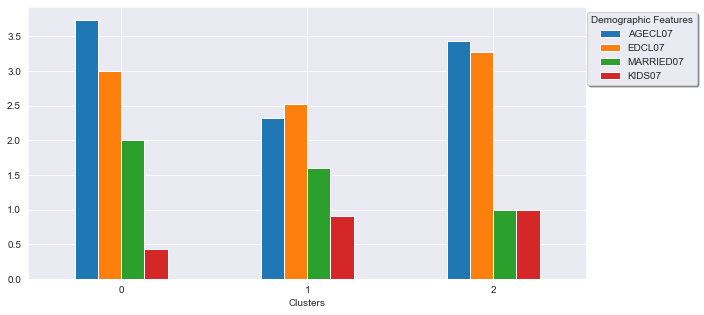

In [77]:
final_df[demographic_features].plot(kind='bar',figsize=(10,5))
plt.legend(title='Demographic Features', bbox_to_anchor=(1.10, 1), loc='upper center', fancybox=True, shadow=True)
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

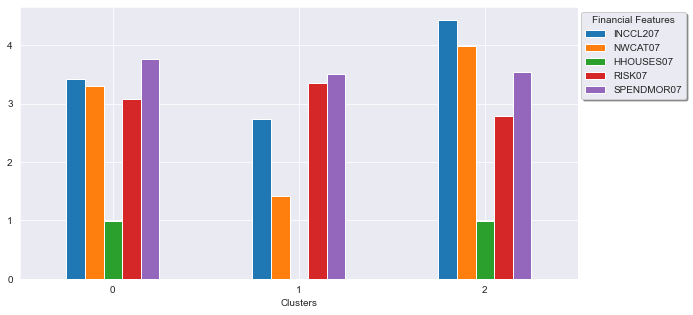

In [78]:
final_df[financial_features+will_to_risk_features].plot(kind='bar',figsize=(10,5))
plt.legend(title='Financial Features', bbox_to_anchor=(1.10, 1), loc='upper center', fancybox=True, shadow=True)
plt.xticks(rotation=0)

These two bar plots shows the average values of demographic, financial and behavioral features for each cluster. 

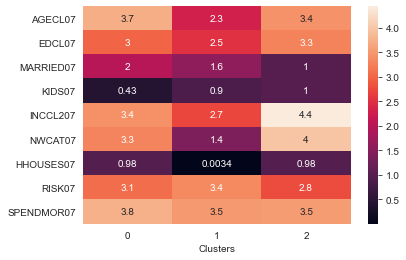

In [80]:
sns.heatmap(final_df.T, annot=True)

**Conclusion from clusters:**

Cluster 0: High age, middle education, medium income and networth, own house, medium ability to take risks. Investor profile: ***Moderate***

Cluster 1: Low age, low education, low income and networth, do not own house, have kids, low ability to take risks. Investor profile: ***Conservative***

Cluster 2: Medium age, high education, high income and networth, own house, high ability to take risks. Investor profile: ***Aggressive***